# Project 9 - Business Analytics #

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Step 1. Data preprocessing](#data_preprocessing)    
* [Step 2. Data Analysis](#data_analysis)
    * [2.1 Product Analysis](#product_analysis)
    * [2.2 Sales Analysis](#sales_analysis)
    * [2.3 Marketing Analysis](#marketing_analysis)
* [Step 3. Conclusion](#conclusion)


 # Introduction <a id='intro'></a>
    
The project aims at helping optimize marketing expenses in the analytical department at Yandex.Afisha. 
 
 The data we have:

* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics

Posed questions: 

* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

# Step 1. Data Preprocessing  <a id='data_preprocessing'></a>


In [1]:
# Import Library
import pandas as pd
import numpy as np 
from scipy import stats as st
import plotly.express as px

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Uploading the dataset
#df = pd.read_csv(r"./visits_log_us.csv", nrows=500)
try:
     df = pd.read_csv(r"./visits_log_us.csv", nrows=500)
except:
     df = pd.read_csv("/datasets/visits_log_us.csv", nrows=500)
#Analyzing the data with the .info() method. In order to find the exact size of the data, adding the parameter memory_usage='deep'.
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


Let's read the result. First of all, we can see that the data is divided into five columns:

- Device — object type (text)
- End Ts — object
- Source Id — integer
- Start Ts — object
- Uid — object

We can also see that the size of the downloaded data is 113.1 kb. We need this information to compare it with the size of the optimized data. 

Next we are going to optimize the data by getting rid of the object type when possible. Objects in pandas are strings (text) and use a lot of memory.

Let's analyze the columns one by one. First we take the Device column. Let's find the number of unique values in the column and how they are distributed. We'll use the value_counts() method:

In [3]:
df['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

This column has only two values: desktop and touch. These are presumably device categories: computers and touch screen devices. 

Pandas has a special type for such data: category. It looks a lot like text but uses considerably less space. Let's convert to this type, using the astype('category') method:

In [4]:
df['Device'] = df['Device'].astype('category')

In [5]:
#Checking the size after changing the type
df.head()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Device     500 non-null    category
 1   End Ts     500 non-null    object  
 2   Source Id  500 non-null    int64   
 3   Start Ts   500 non-null    object  
 4   Uid        500 non-null    uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 82.9 KB


Now our DataFrame is 82.9 kilobytes instead of 113.1. We've managed to make it smaller by changing the data type in one of the columns. Let's change the dates format now.

The columns Start Ts and End Ts contain the date and time. Let's convert the object type to date with the to_datetime() method.

In [6]:
df['Start Ts'] =  pd.to_datetime(df['Start Ts'], format="%Y.%m.%d")
df['End Ts'] =  pd.to_datetime(df['End Ts'], format="%Y.%m.%d")

In [7]:
#Checking the changed size
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


Now we have only 16.5 kilobytes! Practically a seventh of the initial size.


Downloading data with the correct data types

In [8]:
visits = pd.read_csv(
    "/datasets/visits_log_us.csv",
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)

In [9]:
#Checking the size of the new data
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


After data optimization we've got only 11.3 MB. Now calculations won't take too long nor cause errors on the online platform.

In [10]:
#Renaming the columns
visits = visits.rename(
        columns = {
            'Device' : 'device',
            'End Ts' : 'end_ts',
            'Source Id' : 'source_id',
            'Start Ts' : 'start_ts',
            'Uid' : 'user_id'
        }
    )

In [11]:
#Checking the new data
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

__Description of the data__

The visits table (server logs with data on website visits):

* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from

In [12]:
#Checking for the missing values
visits.isnull().values.sum()

0

In [13]:
# Checking for duplicated values
visits.duplicated().sum()

0

In [14]:
# Read file, change datatypes, parse dates, and rename columns
orders = pd.read_csv(
          "/datasets/orders_log_us.csv",
        parse_dates=['Buy Ts']
    ).rename(
        columns = {
            'Uid' : 'user_id',
            'Buy Ts' : 'order_ts',
            'Revenue' : 'revenue'
        }
    )


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_ts  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float64       
 2   user_id   50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
orders.head()

order_ts  revenue               user_id
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

__Description of the data__

The orders table (data on orders):

* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

In [17]:
#Checking for the missing values
orders.isnull().values.sum()

0

In [18]:
#Checking for duplicated values
orders.duplicated().sum()

0

In [19]:
# Read file, change datatypes, parse dates, and rename columns
costs = pd.read_csv(
       "/datasets/costs_us.csv",
        parse_dates=['dt']
    ).rename(
        columns = {
            'dt' : 'date'
        }
    )

In [20]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


source_id       date  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

__Description of the data__

The costs table (data on marketing expenses):

* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day

In [21]:
#Checking for the missing values
costs.isnull().values.sum()

0

In [22]:
# Checking for duplicated values
costs.duplicated().sum()

0

[Back to Contents](#back)

# Step 2. Data Analysis <a id='data_analysis'></a>


After the data has been loaded and optimized, we can start performing the analysis based on the assigned task. This project divides the analysis process into 3 topics: Product Analysis, Sales Analysis, Marketing Analysis.

## Product Analysis  <a id='product_analysis'></a>





By conducting product analysis, we are expected to answer these following questions:

1. How many people use the product every day, week, and month?
2. What is the number of sessions per day? (One user may have more than one session).
3. What is the length of each session?
4. What's the user retention rate?





__Q1. Daily, weekly, and monthly active user__

To answer the first question, we have to obtain the main metrics that can describe the number of active users

* DAU — number of daily active users (unique)
* WAU — number of weekly active users
* MAU — number of monthly active users

We have the user ID, the source of the user's origin, as well as a timestamp that contains session start and session end data. To calculate weekly and monthly activity, we must first create separate columns for the year, month, and week values.



In [23]:
visits['year'] = visits['start_ts'].dt.year
#visits['month'] = visits['start_ts'].dt.month
#visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['week']  = pd.to_datetime(visits['start_ts']).values.astype('datetime64[W]')
visits['month'] = visits['start_ts'].values.astype('datetime64[M]')
visits['date'] = visits['start_ts'].dt.date
costs['cost_month']=costs['date'].values.astype('datetime64[M]')

#Creating additional date parameters that will help us in cohort analysis 
# visits['week']  = pd.to_datetime(visits['start_ts']).values.astype('datetime64[W]')
# visits['month'] = visits['start_ts'].values.astype('datetime64[M]')
# costs['cost_month']=costs['dt'].values.astype('datetime64[M]')

visits.head()


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id  year       week      month        date  
0  16879256277535980062  2017 2017-12-14 2017-12-01  2017-12-20  
1    104060357244891740  2018 2018-02-15 2018-02-01  2018-02-19  
2   7459035603376831527  2017 2017-06-29 2017-07-01  2017-07-01  
3  16174680259334210214  2018 2018-05-17 2018-05-01  2018-05-20  
4   9969694820036681168  2017 2017-12-21 2017-12-01  2017-12-27

In [24]:
costs.head()

source_id       date  costs cost_month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

__Description of the data__

The visits table (server logs with data on website visits):

* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from
* year — The year of session start
* month — The month of session start
* week — The ISO week date of session start
* date — the date of session start in the format of %Y-%m-%d

Now, let's calculate the metric. We'll group the existing data by the date/week/month of the session and look for the average values:

In [25]:
#Using groupby method to calculate unique users per day. 
dau=visits.groupby(visits['date'])['user_id'].nunique().reset_index()
dau.head()

date  user_id
0  2017-06-01      605
1  2017-06-02      608
2  2017-06-03      445
3  2017-06-04      476
4  2017-06-05      820

In [26]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(dau,x="date", y="user_id",title='DAU')
#adding reference line with average DAU over time
fig.add_hline(y=dau['user_id'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

Conclusions:

* User activity peaked in November 2017. A peak in user activity for Yandex.Afisha this month could be due to the holiday season, cultural events, promotions, marketing campaigns, new features, or weather-related shifts towards indoor activities.
* The __DAU__ metric fluctuated throughout the observed period.
* There was a slight increase in user activity from July to November, reaching its peak on November 24 before declining and experiencing a notable decrease on March 30.

In [27]:
wau=visits.groupby(visits['week'])['user_id'].nunique().reset_index()
wau.head()

week  user_id
0 2017-06-01     4082
1 2017-06-08     3311
2 2017-06-15     2844
3 2017-06-22     3079
4 2017-06-29     3055

In [28]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="WAU")))
fig.add_trace(go.Scatter(x=wau['week'], 
                        y=wau['user_id'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=wau['user_id'].mean(),line_dash="dash", line_color="red", annotation_text="average WAU",
             annotation_position="top left")
fig.show()

Conclusions:

The __WAU__ metric fluctuates throughout the year, with an increase starting in the first week of October, reaching its peak in November and gradually declines until it reaches its first dip at the end of March and then goes even lower at the end of May. 


This trend can be explained by the users' seasonal preferences, as people tend to seek indoor entertainment more during colder months. We can clearly see on the graph that users are more prone to buying tickets from October to March.

Additionally, we can see that the average WAU doesn't give us an accurate picture of the weekly users activity, due to the great fluctuation of this metric and connection to the seasonality.


In [29]:
mau=visits.groupby(visits['month'])['user_id'].nunique().reset_index()
wau.head()

week  user_id
0 2017-06-01     4082
1 2017-06-08     3311
2 2017-06-15     2844
3 2017-06-22     3079
4 2017-06-29     3055

In [30]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="MAU")))
fig.add_trace(go.Scatter(x=mau['month'], 
                        y=mau['user_id'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=mau['user_id'].mean(),line_dash="dash", line_color="red", annotation_text="average MAU",
             annotation_position="top left")
fig.show()

Conclusions: 

We can see the similar trend to DAU and WAU metrics. Likewise, there are more users in colder months, and a decline in activity in the spring and in the summer. 

What's more, the difference in months is more pronounced in this visualizaion. October, November and December show the highest number in the users' activity. 

Closely to the previous metrics, the average MAU doesn't describe accurately the metric od users' activity.  

Despite of its lack of representativity, let's still calculate the average number of users daily, weekly and monthly.

In [31]:
dau_total = visits.groupby('date').agg({'user_id': 'nunique'}).mean()
wau_total = visits.groupby('week').agg({'user_id': 'nunique'}).mean()
mau_total = visits.groupby('month').agg({'user_id': 'nunique'}).mean()


print('Average daily user:', int(dau_total), 'People')
print('Average weekly user:', int(wau_total), 'People')
print('Average monthly user:', int(mau_total), 'People')

Average daily user: 907 People
Average weekly user: 5724 People
Average monthly user: 23228 People


We have answered the first question of product analysis.

* Average daily user: 907 People
* Average weekly user: 5825 People
* Average monthly user: 23228 People

[Back to Contents](#back)

__Q2. Sessions per Day__

To answer the second question, we will need a metric of Session per Day. Calculating this metric is relatively easy. We just need to count the session of each day and obtain the average value.

In [32]:
avg_session_per_day = visits.groupby('date').agg({'user_id':'count'}).mean()

print('Average session per day:', int(avg_session_per_day), 'Session')

Average session per day: 987 Session


Now we know that in average, Yandex.Afisha was visited 987 times each day. Please note that the same person can open the website 2 or more times per day.

For even more interesting insights, we can calculate the Session per User metric. We just need to divide the number of sessions by the number of users for a given period.

Let's calculate the number of session per user for each month.

In [33]:
avg_session_per_month = visits.groupby('month').agg({'user_id':'count'}).mean()
avg_n_users_per_month = visits.groupby('month').agg({'user_id':'nunique'}).mean()
average_session_per_user = avg_session_per_month / avg_n_users_per_month

print('On average, each user spends at most', int(average_session_per_user), 'Session per month')

On average, each user spends at most 1 Session per month


On average, each user spends at most 1 session on the app per month. We can't say it's used very frequently.

__Q3. Average Session Length__

Average session length or ASL is the amount of time a user spends while using the product in an average session. 

Let's find the ASL by calculating the length of the entire session duration and finding the average:

In [34]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Average session length in seconds:', visits['duration'].mean())
print('Average session length in minutes:',(visits['duration'].mean()/60).round(2),'minutes')


Average session length in seconds: 643.506488592098
Average session length in minutes: 10.73 minutes


In average, the session length of Y.Afisha visitors are approximately at 10 minutes. This value makes sense because each user will require time to surf the contents of the Y.Afisha website before finally terminating the session.

Let's look into the session length distribution:

Mode of session length: 60 seconds


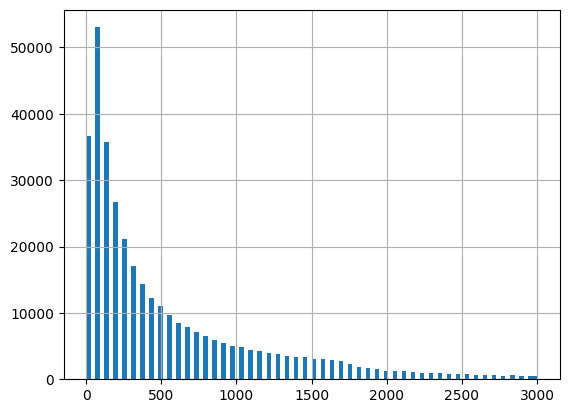

In [35]:
visits['duration'].hist(bins=100, range=(0,3000))
print('Mode of session length:',int(visits['duration'].mode()), 'seconds')

As we see from the graph the distribution is right-skewed, in this case we need to use the mode instead of average or median.

Therefore, the mode of session length of Yandex.Afisha visits is 60 seconds.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №4__

Absolutely right!

__Q4. Retention rate or Sticky Factor__

To answer the last question, we can use the Sticky Factor metric. This metric shows the level of audience loyalty—how often users return to your website. The formula is quite simple, we just need the ratio of daily average user to the weekly/monthly average user.

In [36]:
sticky_wau = (dau_total/wau_total) *100
sticky_mau = (dau_total/mau_total) *100

print('Weekly sticky factor:',"%.2f" % sticky_wau, '%')
print('Monthly sticky factor:',"%.2f" % sticky_mau, '%')

Weekly sticky factor: 15.86 %
Monthly sticky factor: 3.91 %


In [37]:
#let's find the first session for each user
min_visit=visits.groupby(['user_id'])['date'].min().reset_index()
min_visit.columns = ['user_id', 'first_session']
min_visit.head()

user_id first_session
0   11863502262781    2018-03-01
1   49537067089222    2018-02-06
2  297729379853735    2017-06-07
3  313578113262317    2017-09-18
4  325320750514679    2017-09-30

In [38]:
#now merging to the original dataset
visits=visits.merge(min_visit, how='inner',on=['user_id'])
orders.head()

order_ts  revenue               user_id
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

Let's do a cohort analysis.

In [39]:
visits['cohort'] = visits['first_session'].values.astype('datetime64[M]')
visits['age'] = ((pd.to_datetime(visits['date']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'M'))\
                                                                        .round().astype('int')
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                user_id  year       week      month        date  duration  \
0  16879256277535980062  2017 2017-12-14 2017-12-01  2017-12-20      1080   
1    104060357244891740  2018 2018-02-15 2018-02-01  2018-02-19      1680   
2   7459035603376831527  2017 2017-06-29 2017-07-01  2017-07-01         0   
3  16174680259334210214  2018 2018-05-17 2018-05-01  2018-05-20      1440   
4  16174680259334210214  2018 2018-03-08 2018-03-01  2018-03-09      1680   

  first_session     cohort  age  
0    2017-12-20 2017-12-01    0  
1    2018-02-19 2018-02-01    0  
2    2017-07-01 2017-07-01    0  
3    2018-03-09 2018-03-01    2  
4    2018-03-09 2018-03-01    0

In [40]:
#let's take a look at actions that happened on a third month, for example
visits[visits.age==3].sample()

device              end_ts  source_id            start_ts  \
109708  desktop 2018-01-18 12:31:00          2 2018-01-18 12:23:00   

                     user_id  year       week      month        date  \
109708  14260571621381313917  2018 2018-01-18 2018-01-01  2018-01-18   

        duration first_session     cohort  age  
109708       480    2017-10-16 2017-10-01    3

Let's compare users behavior from different cohorts after certain period of time.

In [41]:
#lets see how many users were active from certain cohorts on a certain time after registration
cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='user_id',
                  aggfunc='nunique').fillna(0)
cohorts

age              0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0   976.0   718.0   805.0  910.0  891.0  844.0  743.0   
2017-07-01  13140.0   739.0   688.0   699.0  738.0  648.0  587.0  653.0   
2017-08-01  10181.0   702.0   633.0   598.0  517.0  436.0  418.0  350.0   
2017-09-01  16704.0  1264.0  1124.0   817.0  660.0  672.0  552.0  436.0   
2017-10-01  25977.0  1899.0  1376.0   987.0  938.0  815.0  548.0  467.0   
2017-11-01  27248.0  1873.0  1276.0  1043.0  854.0  660.0  504.0   75.0   
2017-12-01  25268.0  1288.0  1038.0   731.0  545.0  414.0   70.0    0.0   
2018-01-01  22624.0  1209.0   821.0   578.0  388.0   44.0    0.0    0.0   
2018-02-01  22197.0  1063.0   596.0   400.0   45.0    0.0    0.0    0.0   
2018-03-01  20589.0   852.0   516.0    76.0    0.0    0.0    0.0    0.0   
2018-04-01  15709.0   622.0    68.0     0.0    0.0    0.0    0.0    0.0   
2018-05-01  15273.0   100.0     0.0     0.0    0.0    0.0    0.0    0.0   

age            8      9      10     11     12  
cohort                                         
2017-06-01  738.0  666.0  547.0  534.0  167.0  
2017-07-01  483.0  389.0  315.0   72.0    0.0  
2017-08-01  295.0  238.0   29.0    0.0    0.0  
2017-09-01  331.0   43.0    0.0    0.0    0.0  
2017-10-01   84.0    0.0    0.0    0.0    0.0  
2017-11-01    0.0    0.0    0.0    0.0    0.0  
2017-12-01    0.0    0.0    0.0    0.0    0.0  
2018-01-01    0.0    0.0    0.0    0.0    0.0  
2018-02-01    0.0    0.0    0.0    0.0    0.0  
2018-03-01    0.0    0.0    0.0    0.0    0.0  
2018-04-01    0.0    0.0    0.0    0.0    0.0  
2018-05-01    0.0    0.0    0.0    0.0    0.0

Keep in mind that retention is a % of those who returned from those who registered. Column age=0 includes all of the users that registered in a cohort, thus, to calculate Retention in % we divide columns for all ages by column when age=0 

In [42]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age          0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.073610  0.054152  0.060713  0.068633  0.067200  0.063655   
2017-07-01  1.0  0.056240  0.052359  0.053196  0.056164  0.049315  0.044673   
2017-08-01  1.0  0.068952  0.062175  0.058737  0.050781  0.042825  0.041057   
2017-09-01  1.0  0.075670  0.067289  0.048910  0.039511  0.040230  0.033046   
2017-10-01  1.0  0.073103  0.052970  0.037995  0.036109  0.031374  0.021096   
2017-11-01  1.0  0.068739  0.046829  0.038278  0.031342  0.024222  0.018497   
2017-12-01  1.0  0.050974  0.041080  0.028930  0.021569  0.016384  0.002770   
2018-01-01  1.0  0.053439  0.036289  0.025548  0.017150  0.001945  0.000000   
2018-02-01  1.0  0.047889  0.026850  0.018020  0.002027  0.000000  0.000000   
2018-03-01  1.0  0.041381  0.025062  0.003691  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.039595  0.004329  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.006548  0.000000  0.000000  0.000000  0.000000  0.000000   

age               7         8         9         10        11        12  
cohort                                                                  
2017-06-01  0.056037  0.055660  0.050230  0.041255  0.040275  0.012595  
2017-07-01  0.049696  0.036758  0.029604  0.023973  0.005479  0.000000  
2017-08-01  0.034378  0.028976  0.023377  0.002848  0.000000  0.000000  
2017-09-01  0.026102  0.019816  0.002574  0.000000  0.000000  0.000000  
2017-10-01  0.017977  0.003234  0.000000  0.000000  0.000000  0.000000  
2017-11-01  0.002752  0.000000  0.000000  0.000000  0.000000  0.000000  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

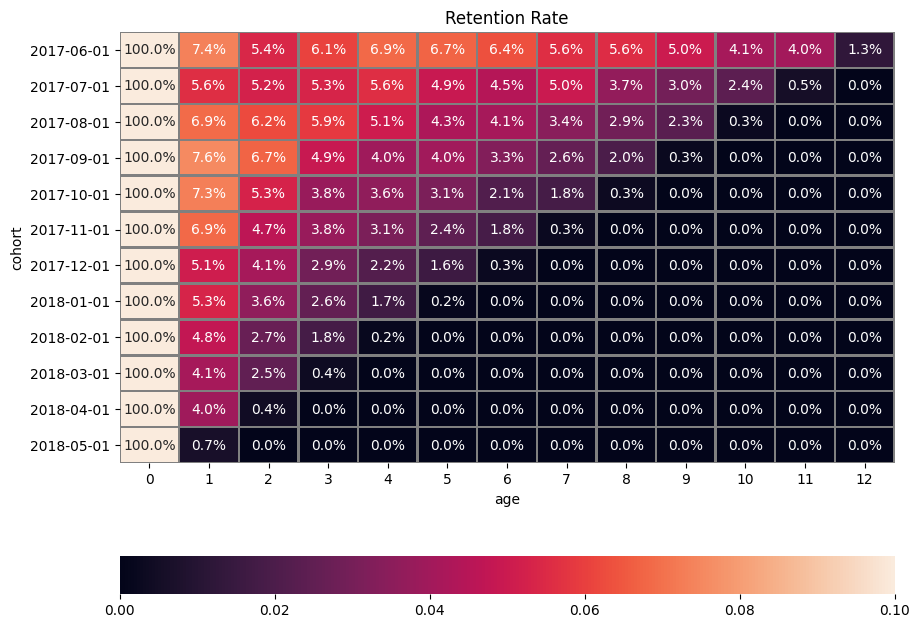

In [43]:
retention.index = retention.index.astype(str)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws={'orientation': 'horizontal'})
ax.set_title('Retention Rate')

plt.show()

Cnclusions:
* Clearly, Yandex.Afisha has a low average sticky factor. To enhance this metric, the marketing team must focus on increasing audience loyalty to the website, encouraging frequent return visits.
* Retetntion rate tends to drop as age increases.
* 2017-09-01 cohort has the highest retention on 1st  and the 2nd month.

__Conclusions__

In our product analysis, we addressed the posed questions by calculating the following metrics.


* _Active User_
 * Daily: 907 users
 * Weekly: 5,825 users
 * Monthly: 23,228 users
 
 
* _Sessions per Day_: 987 sessions


* _Session Length_:
 * Average: 10 minutes
 * Mode: 60 seconds
 
 
* _Sticky Factor_:
 * Weekly: 15.59%
 * Monthly: 3.91%

[Back to Contents](#back)

## Sales Analysis <a id='sales_analysis'></a>



In Sales Analysis we need to answer the following questions:

1. When do people start buying? 
2. How many orders do they make during a given period of time?
3. What is the average purchase size?
4. How much money do they bring? (LTV)

__Q1. Lead time__

To answer the first question, we need to calculate the lead time metric. A lead time is the latency between the initiation and completion of a process. Or in this scenario, a latency between the first time a user visit the Y.Afisha website and the first time user complete an order.

We have the order time stamp, the revenue, as well as a the user ID. To calculate lead time, we must first create separate columns for the time stamp of the first order and the first session of each user.

In [44]:
first_order_ts = orders.groupby('user_id')['order_ts'].min()
first_session_ts = visits.groupby('user_id')['start_ts'].min()

first_order_ts.name = 'first_order_ts'
first_session_ts.name = 'first_session_ts'

orders = orders.join(first_order_ts, on='user_id')
orders = orders.join(first_session_ts, on='user_id')

orders['lead_time'] = ((orders['first_order_ts'] - orders['first_session_ts']).dt.seconds)/(60)

orders.head()

order_ts  revenue               user_id      first_order_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

     first_session_ts  lead_time  
0 2017-06-01 00:09:00        1.0  
1 2017-06-01 00:14:00       11.0  
2 2017-06-01 00:25:00        2.0  
3 2017-06-01 00:14:00       15.0  
4 2017-06-01 07:31:00       27.0

__Description of the Data__

* order_ts — Order date and time
* revenue — Revenue generated per order
* user_id — User ID
* first_order_ts — First order date and time
* first_session_ts — First session start date and time
* lead_time — Latency between the first visit and the first order in minutes

Median time taken before user decide to order: 20 minutes
Average time taken before user decide to order: 284 minutes
Maximum time taken before user decide to order: 24 hours


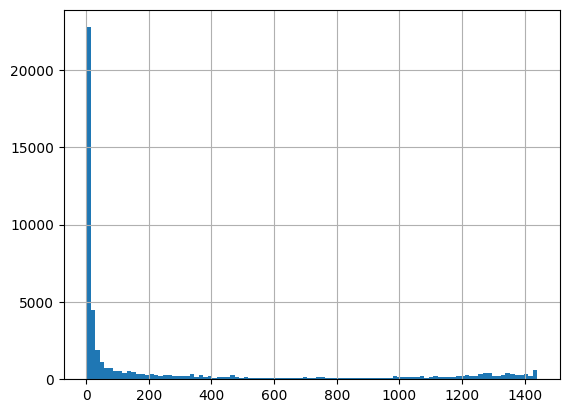

In [45]:
orders['lead_time'].hist(bins=100)
print('Median time taken before user decide to order:',int(orders['lead_time'].median()), 'minutes')
print('Average time taken before user decide to order:',int(orders['lead_time'].mean()), 'minutes')
print('Maximum time taken before user decide to order:', int((orders['lead_time'].max()/60).round()), 'hours' )


__Q2 How many orders do they make during a given period of time? Cohort Analysis__

The given time - month since they registered

In [46]:
orders['first_order_month'] = orders['first_order_ts'].astype(
    'datetime64[M]'
)
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')

orders['cohort_lifetime'] = (
    orders['order_month'] - orders['first_order_month']
) / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m') 

orders.head()

order_ts  revenue               user_id      first_order_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

     first_session_ts  lead_time first_order_month order_month  \
0 2017-06-01 00:09:00        1.0           2017-06  2017-06-01   
1 2017-06-01 00:14:00       11.0           2017-06  2017-06-01   
2 2017-06-01 00:25:00        2.0           2017-06  2017-06-01   
3 2017-06-01 00:14:00       15.0           2017-06  2017-06-01   
4 2017-06-01 07:31:00       27.0           2017-06  2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

Column Description

* order_ts — Order date and time
* revenue — Revenue generated per order
* user_id — User ID
* first_order_ts — First order date and time
* first_session_ts — First session start date and time
* lead_time — Latency between the first visit and the first order in minutes
* first_order_month — cohort month
* order_month — Order month
* cohort_lifetime — the number of months of purchase relative to the cohort month.
Now we'll build a pivot table that shows the change in count of order. Its columns will contain the lifecycle and the rows will contain cohorts

In [47]:
order_pivot = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='user_id',
    aggfunc='count',
)

order_pivot.fillna('') 

cohort_lifetime        0      1      2      3      4      5      6      7   \
first_order_month                                                            
2017-06            2354.0  177.0  174.0  226.0  292.0  218.0  276.0  174.0   
2017-07            2186.0  100.0  120.0  104.0   72.0   82.0   61.0   50.0   
2017-08            1533.0  108.0  100.0   81.0   85.0   62.0   49.0   78.0   
2017-09            2933.0  219.0  161.0  164.0   67.0  109.0  108.0   56.0   
2017-10            4964.0  314.0  162.0  122.0  129.0  103.0   86.0  125.0   
2017-11            4813.0  397.0  182.0  211.0  136.0   59.0  102.0          
2017-12            5052.0  270.0  202.0  179.0   86.0  105.0                 
2018-01            3783.0  224.0  159.0   64.0   78.0                        
2018-02            4095.0  222.0   83.0   70.0                               
2018-03            4130.0  178.0  176.0                                      
2018-04            2495.0  195.0                                             
2018-05            3249.0                                                    
2018-06               1.0                                                    

cohort_lifetime       8      9     10    11  
first_order_month                            
2017-06            212.0  153.0  96.0  86.0  
2017-07             58.0   24.0  53.0        
2017-08             46.0   46.0              
2017-09             61.0                     
2017-10                                      
2017-11                                      
2017-12                                      
2018-01                                      
2018-02                                      
2018-03                                      
2018-04                                      
2018-05                                      
2018-06

Let's add color and modify the table into a heatmap to see the trends and patterns.

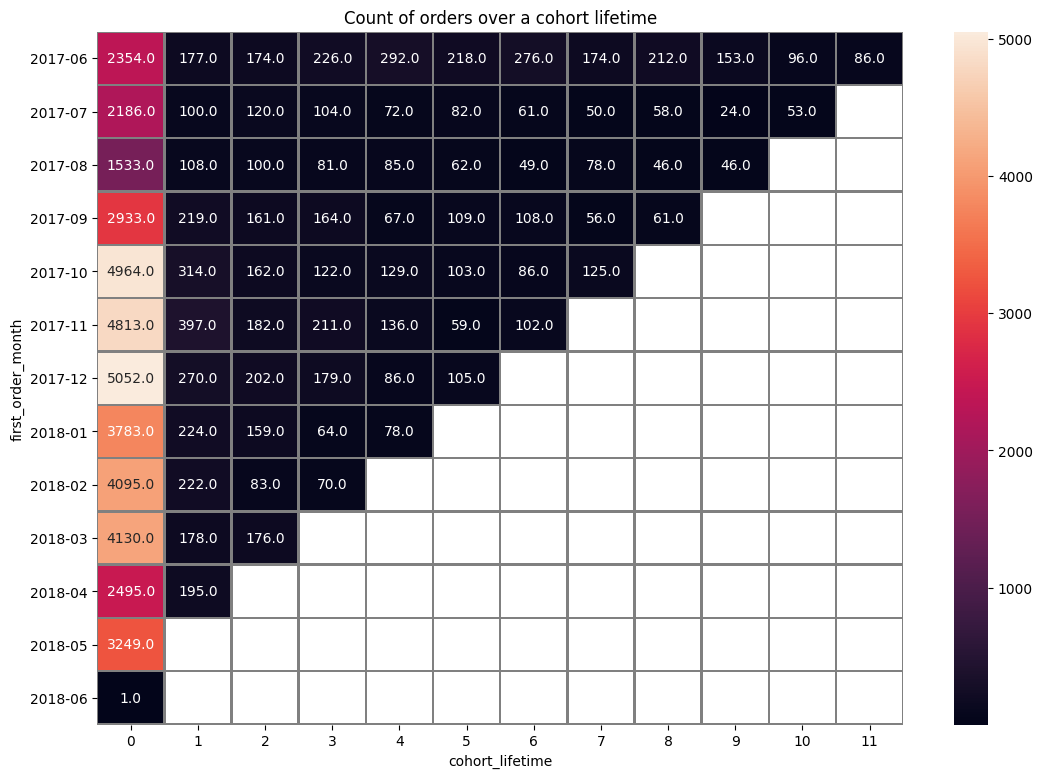

In [48]:
plt.figure(figsize=(13, 9))
plt.title('Count of orders over a cohort lifetime')
order_heatmap = sns.heatmap(
    order_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

Conclusions

* We can see that of the 2354 customers who made their first order in June 2017, 177 made another order the next month, with 174 making an order two months later, 226 after three months, and so on. From this, we can make a conclusion that first month has the highest number of orders. 
* The first three cohorts experience a rise in orders in October, November and December. 
* There is a big drop in numbers for most months between columns three and four. What we can take from this is that the critical time for customer retention is three months after the first purchase. 
* The number of users in each cohort life time decreases drastically from month to month. This indicates that the number of customers making second or more purchases is getting less and less.

__Q3. Average Purchase Size__

Average Purchase Value refers to the average dollar amount spent on your services for each customer. This metric can either be calculated based on the overall value of the contract or it's annual, quarterly, monthly, or weekly value. In this scenario, we will calculate purchase size for each cohort and cohort life time.

To calculate this metric we have to devide the revenue grouped by cohorts by the number of users groped by cohorts.

In [49]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'cohort_lifetime']
).agg({'revenue': 'sum', 'user_id': 'nunique'})

orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['user_id']
) 

orders_grouped_by_cohorts.columns = ['sum_revenue', 'n_users', 'revenue_per_user']

orders_grouped_by_cohorts

sum_revenue  n_users  revenue_per_user
first_order_month cohort_lifetime                                        
2017-06           0                    9557.49     2023          4.724414
                  1                     981.82       61         16.095410
                  2                     885.34       50         17.706800
                  3                    1931.30       54         35.764815
                  4                    2068.58       88         23.506591
...                                        ...      ...               ...
2018-03           2                    1114.87       58         19.221897
2018-04           0                   10600.69     2276          4.657597
                  1                    1209.92       69         17.535072
2018-05           0                   13925.76     2988          4.660562
2018-06           0                       3.42        1          3.420000

[79 rows x 3 columns]

Now we'll build a pivot table that shows the change in revenue per order average. Its columns will contain the lifecycle and the rows will contain cohorts



In [50]:
revenue_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
) 

revenue_pivot.fillna('') 

cohort_lifetime          0          1          2           3          4   \
first_order_month                                                          
2017-06            4.724414   16.09541    17.7068   35.764815  23.506591   
2017-07            6.010218  12.396346  21.035965   10.786094   6.938163   
2017-08            5.276518  11.148793  11.851321   12.182955   16.92125   
2017-09            5.644529  22.188385    13.4452  138.669189  19.881538   
2017-10            5.003733  11.287427   6.753252    7.413152   7.072796   
2017-11            5.154683   7.339054   6.786583    12.51066   7.457284   
2017-12            4.738191   7.816575  39.366019   48.135052    27.4314   
2018-01            4.135636   8.721228  12.365542   11.199767   4.699556   
2018-02            4.156987       8.61   4.942414    6.941026              
2018-03            4.838803  11.811667  19.221897                          
2018-04            4.657597  17.535072                                     
2018-05            4.660562                                                
2018-06            3.420000                                                

cohort_lifetime           5          6          7          8          9   \
first_order_month                                                          
2017-06            22.207761  31.011935  25.033191   19.29569  27.233556   
2017-07             7.896842   6.421111   6.992821   7.382143  12.861818   
2017-08            12.139063   9.620333  12.610455      21.07   8.307419   
2017-09               26.095  27.437121  16.961351  11.044651              
2017-10             7.255139   6.573214   7.479701                         
2017-11             4.580833   7.564839                                    
2017-12            23.518413                                               
2018-01                                                                    
2018-02                                                                    
2018-03                                                                    
2018-04                                                                    
2018-05                                                                    
2018-06                                                                    

cohort_lifetime           10        11  
first_order_month                       
2017-06            25.681333  9.804151  
2017-07            11.513846            
2017-08                                 
2017-09                                 
2017-10                                 
2017-11                                 
2017-12                                 
2018-01                                 
2018-02                                 
2018-03                                 
2018-04                                 
2018-05                                 
2018-06

Let's visualize the table with the heatmap.

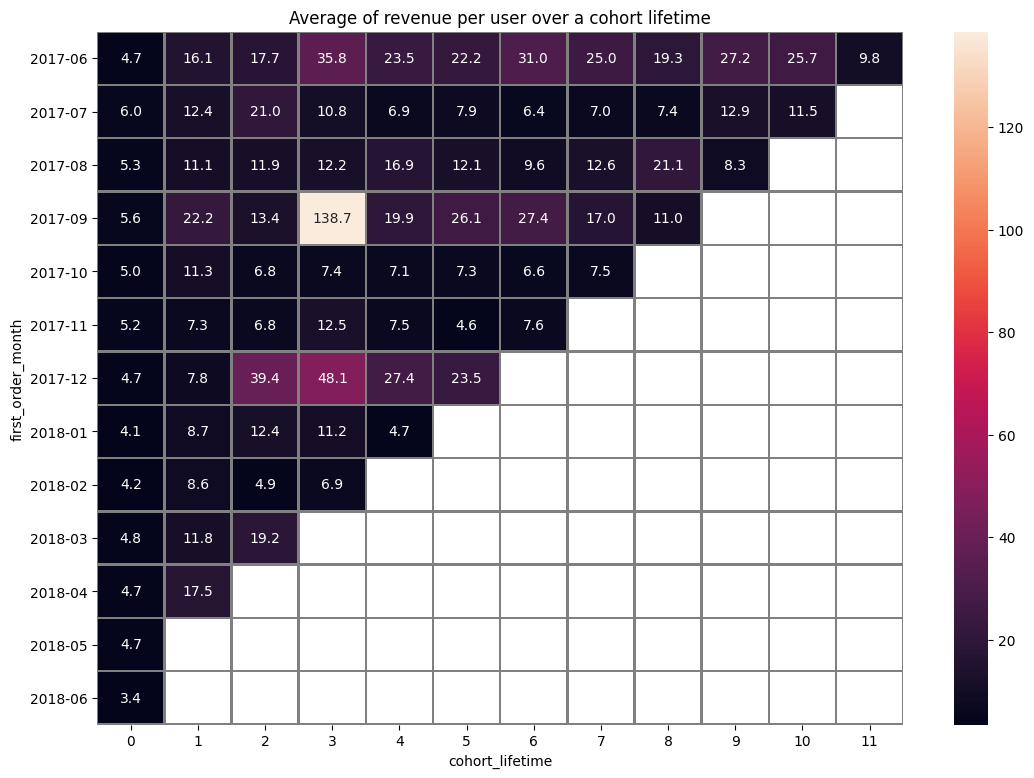

In [51]:
plt.figure(figsize=(13, 9))
plt.title('Average of revenue per user over a cohort lifetime')
revenue_heatmap = sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

On the heatmap, we can see the average purchase size of each cohort. 

* We can see a steady increse of the revenue on the top line, users who joined in June 2017 generally have the highest average purchase size.
* The third month for cohort of September,2017 stands out. Obviously, something happened that time to boost sales among returning customers.
* There is a sharp increase in purchase size for cohort that started in December, 2017.It can be attributed to an offer or a promotion or to some external factor that the business must determine.

__Q4. How much money do they bring? (LTV)__

LTV is the customer's lifetime value. It's the total amount of money a customer brings to the company on average by making purchases. When calculating LTV, analysts usually consider the gross profit from a customer per period. 

It's helpful to find the LTV for different cohorts. Let's review what we need to do:

1. Find the date of each customer's first purchase
2. Calculate the number of new customers for each date (or range of dates — here, for each month)
3. Add the month of the first order to the table of orders
4. Group the table and calculate the revenue

We have data for almost a year. It'll be best to make monthly cohorts. Let's capture the months from the dates in the tables of orders and costs:

In [52]:
# calculate the number of new subscribers () for each month
cohort_sizes = orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohort_sizes.head()

first_order_month  n_buyers
0           2017-06      2023
1           2017-07      1923
2           2017-08      1370
3           2017-09      2581
4           2017-10      4340

Now we'll create a cohort by grouping the table of orders by month of first purchase, cohort lifetime and month of purchase and sum up the revenue. We'll set the index to the default.

In [53]:
# Group the "orders" table by month of first purchase and month of purchase. Add up the income. 
cohorts = orders.groupby(['first_order_month','cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()

cohorts.head()

first_order_month  cohort_lifetime order_month  revenue
0           2017-06                0  2017-06-01  9557.49
1           2017-06                1  2017-07-01   981.82
2           2017-06                2  2017-08-01   885.34
3           2017-06                3  2017-09-01  1931.30
4           2017-06                4  2017-10-01  2068.58

The row of the cohort table specifies the revenue the cohort brought. For example, from the 0 row we can see that the customers who placed their first order in June 2017 brought in a total revenue of $9557,49 that month.

In a cohort analysis, LTV is the cumulative income of a cohort that takes into account the number of people in the cohort. Let's add data related to the number of users who made their first purchase in each month to the table

In [54]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

first_order_month  n_buyers  cohort_lifetime order_month  revenue
0           2017-06      2023                0  2017-06-01  9557.49
1           2017-06      2023                1  2017-07-01   981.82
2           2017-06      2023                2  2017-08-01   885.34
3           2017-06      2023                3  2017-09-01  1931.30
4           2017-06      2023                4  2017-10-01  2068.58

 The first five values in this column are the same, since they all concern the same cohort (June 2017).
 
 
Since LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability

In [55]:
# Calculating the gp
#margin_rate = 0.5
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate


 Now we are going to divide the profit of the cohort for each month by the total number of users in each cohort.

In [56]:
# Calculating LTV
report['ltv'] =  report['revenue'] / report['n_buyers']

report.head() 

first_order_month  n_buyers  cohort_lifetime order_month  revenue       gp  \
0           2017-06      2023                0  2017-06-01  9557.49  9557.49   
1           2017-06      2023                1  2017-07-01   981.82   981.82   
2           2017-06      2023                2  2017-08-01   885.34   885.34   
3           2017-06      2023                3  2017-09-01  1931.30  1931.30   
4           2017-06      2023                4  2017-10-01  2068.58  2068.58   

        ltv  
0  4.724414  
1  0.485329  
2  0.437637  
3  0.954671  
4  1.022531

We'll visualize the cohorts as a pivot table to make things clear:

In [57]:
ltv_pivot = report.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
).round(2).cumsum(axis=1)

ltv_pivot.fillna('') 

cohort_lifetime      0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06            4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.44   
2017-07            6.01  6.35  6.97   7.33   7.51   7.67   7.79   7.93   8.09   
2017-08            5.28  5.75  6.21    6.6   7.09   7.37   7.58   7.99   8.28   
2017-09            5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.43   
2017-10            5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11            5.15  5.55  5.75   6.07   6.22   6.27   6.38                 
2017-12            4.74   5.0  5.93    7.0   7.31   7.65                        
2018-01            4.14  4.43  4.73   4.87   4.93                               
2018-02            4.16  4.44  4.52   4.59                                      
2018-03            4.84  5.14  5.46                                             
2018-04            4.66  5.19                                                   
2018-05            4.66                                                         
2018-06            3.42                                                         

cohort_lifetime       9      10     11  
first_order_month                       
2017-06            11.05  11.62  11.88  
2017-07             8.24    8.4         
2017-08             8.47                
2017-09                                 
2017-10                                 
2017-11                                 
2017-12                                 
2018-01                                 
2018-02                                 
2018-03                                 
2018-04                                 
2018-05                                 
2018-06

Let's creat a heatmap.

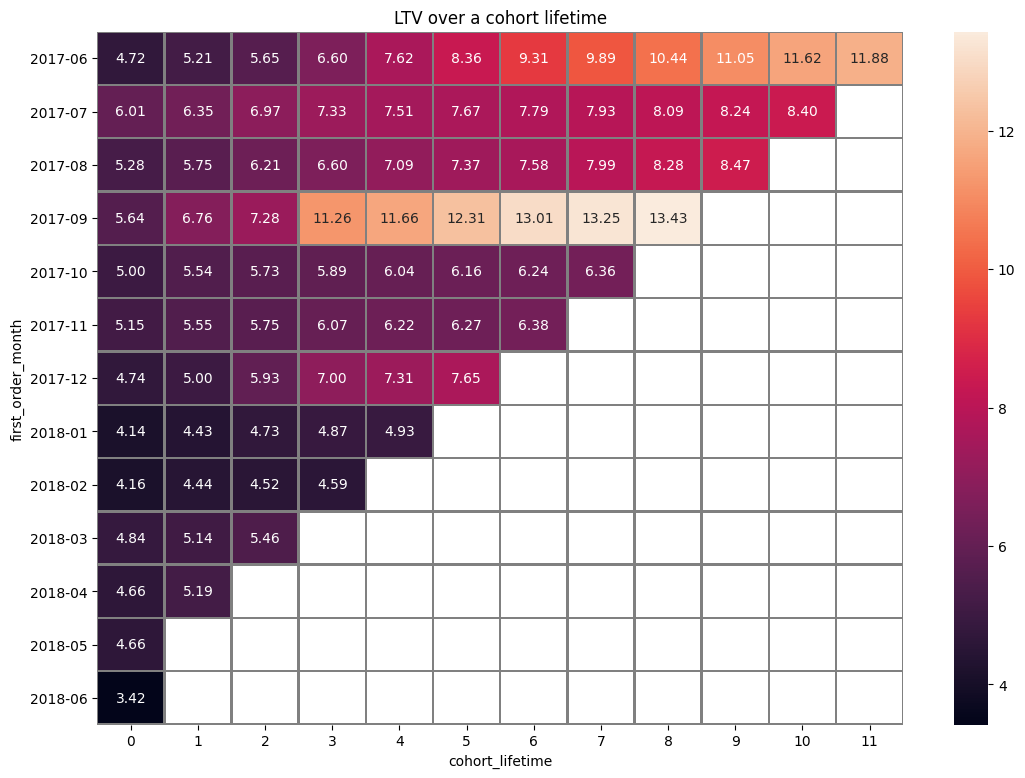

In [58]:
plt.figure(figsize=(13, 9))
plt.title('LTV over a cohort lifetime')
order_heatmap = sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 


Conclusion:
* The cumulative LTV is increasing steadily meaning people continue purchasing every month.
* The initial purchase is higher than the following months. 
* There was a leap in LTV for the 2017-09 cohort in month four.
* 2017-09 cohort has the best cumulative LTV after 6 months, which is 13.01

In [59]:
ltv_201706 = ltv_pivot.loc['2017-06'].sum()
ltv_201706

102.35000000000001

On average, each customer from the first cohort brought $11,88 in revenue over their twelve-month liftetime.

Conclusions


* Lead time - Time taken from the first session start to a final decision to purchase product
Average: 4 hours and 44 minutes

Median: 20 minutes

Max: 24 hours

* Cohort Analysis

Order count: The significant drop after the first month for each cohort show a majority of users are not making repeat purchases.

Average revenue per user: This analysis shows that the buyer who decided to make a repeat purchase, order in higher volume then their first order.

Lifetime Value: Each cohort starts with almost similar LTV, experience drop in average revenue per buyer the following month and cumulatively continues to increase in value.

[Back to Contents](#back)

## Marketing Analysis   <a id='marketing_analysis'></a>

By conducting marketing analysis, you were expected to answer these following questions:

1. How much money is spent? Overall/per source/over time
2. How much does customer acquisition cost from each source?
3. How profitable is the investment? (ROI)

__Q1. How much money is spent? Overall/per source/over time__

In [60]:
#sorting cost for futher visualization
costs=costs.sort_values(by=['date','source_id'])
costs.head()

source_id       date   costs cost_month
0             1 2017-06-01   75.20 2017-06-01
363           2 2017-06-01  132.56 2017-06-01
726           3 2017-06-01  349.38 2017-06-01
1089          4 2017-06-01   76.74 2017-06-01
1452          5 2017-06-01   73.24 2017-06-01

In [61]:
print('Total marketing cost is','${}'.format(costs['costs'].sum()))

Total marketing cost is $329131.62


In [62]:
# Checking how it splits across the sources
expense_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
expense_per_source.head()

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10

In [63]:
#plotting costs over time
import plotly.express as px
fig = px.line(costs, x="date", y="costs", color='source_id')
fig.show()

In [64]:
costs['month'] = costs['date'].astype('datetime64[M]')

expense_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
expense_per_month['percentage'] = expense_per_month['costs'] / (costs['costs'].sum()) *100

expense_per_month['month'] = expense_per_month['month'].dt.strftime('%Y-%m') 

expense_per_month

month     costs  percentage
0   2017-06  18015.00    5.473494
1   2017-07  18240.59    5.542035
2   2017-08  14790.54    4.493807
3   2017-09  24368.91    7.404001
4   2017-10  36322.88   11.035974
5   2017-11  37907.88   11.517544
6   2017-12  38315.35   11.641346
7   2018-01  33518.52   10.183926
8   2018-02  32723.03    9.942232
9   2018-03  30415.27    9.241066
10  2018-04  22289.38    6.772178
11  2018-05  22224.27    6.752396

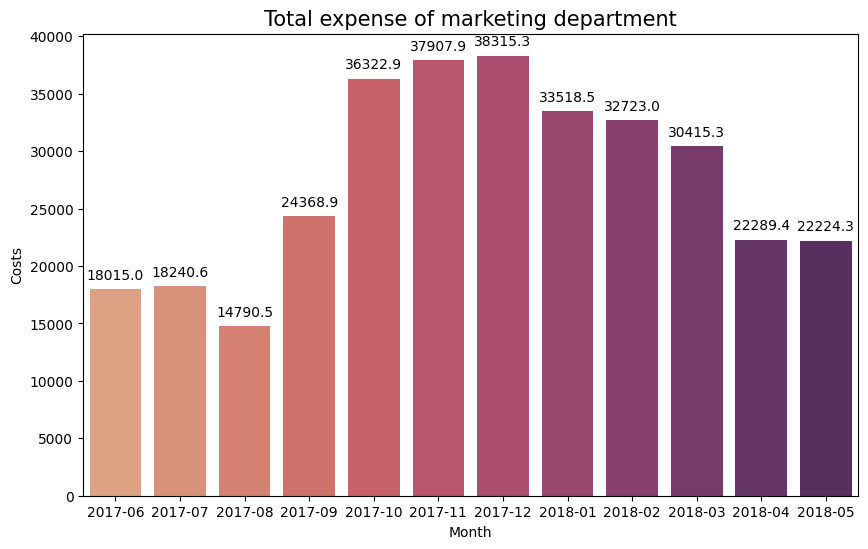

In [65]:
plt.figure(figsize=(10,6))
a = sns.barplot(data=expense_per_month, x='month', y='costs', palette='flare')

for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
plt.title('Total expense of marketing department',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Costs')
plt.show()

Conclusions:
* Overall marketing cost is 329 131 USD
* In total, marketing department have spent more than $300.000 where 43% of it was used for ad source 3
* Marketing spending increases at the end of the year and decreases towards the middle of the year

__Q2. How much does customer acquisition cost from each source?__


CAC (customer acquisition cost) is the cost spent on attracting a customer—the money a company spends on new customers. In this scenario, we first have to obtain the number of customer from visits data.

For customer acquistion we will calculate it based on buyers from orders table. We will do it by month. We need to group costs and customers by month then.

In [66]:
#Grouping costs and customers by month.
marketing_by_month=costs.groupby(['cost_month'])['costs'].sum().reset_index()
marketing_by_month.head()

cost_month     costs
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88

In [67]:
#For each user let's find the time of first order.
first_order=orders.groupby(['user_id'])['order_ts'].min().reset_index()
first_order.columns = ['user_id', 'first_order']
first_order.head()

user_id         first_order
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [68]:
#Merging the info on first_order to the orders table. 
orders=orders.merge(first_order, how='left',on=['user_id'])
orders.head()

order_ts  revenue               user_id      first_order_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

     first_session_ts  lead_time first_order_month order_month  \
0 2017-06-01 00:09:00        1.0           2017-06  2017-06-01   
1 2017-06-01 00:14:00       11.0           2017-06  2017-06-01   
2 2017-06-01 00:25:00        2.0           2017-06  2017-06-01   
3 2017-06-01 00:14:00       15.0           2017-06  2017-06-01   
4 2017-06-01 07:31:00       27.0           2017-06  2017-06-01   

   cohort_lifetime         first_order  
0                0 2017-06-01 00:10:00  
1                0 2017-06-01 00:25:00  
2                0 2017-06-01 00:27:00  
3                0 2017-06-01 00:29:00  
4                0 2017-06-01 07:58:00

In [69]:
#Defining cohort month through first order
orders['first_order_month']=orders['first_order'].values.astype('datetime64[M]')
orders.head()

order_ts  revenue               user_id      first_order_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

     first_session_ts  lead_time first_order_month order_month  \
0 2017-06-01 00:09:00        1.0        2017-06-01  2017-06-01   
1 2017-06-01 00:14:00       11.0        2017-06-01  2017-06-01   
2 2017-06-01 00:25:00        2.0        2017-06-01  2017-06-01   
3 2017-06-01 00:14:00       15.0        2017-06-01  2017-06-01   
4 2017-06-01 07:31:00       27.0        2017-06-01  2017-06-01   

   cohort_lifetime         first_order  
0                0 2017-06-01 00:10:00  
1                0 2017-06-01 00:25:00  
2                0 2017-06-01 00:27:00  
3                0 2017-06-01 00:29:00  
4                0 2017-06-01 07:58:00

In [70]:
buyers_per_moth=orders.groupby(['first_order_month'])['user_id'].nunique().reset_index()
buyers_per_moth.columns=['cost_month','buyers']
buyers_per_moth.head()

cost_month  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

In [71]:
#Caclulating CAC per month.
CAC_per_month=marketing_by_month.merge(buyers_per_moth,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

cost_month     costs  buyers        CAC
0 2017-06-01  18015.00    2023   8.905091
1 2017-07-01  18240.59    1923   9.485486
2 2017-08-01  14790.54    1370  10.796015
3 2017-09-01  24368.91    2581   9.441654
4 2017-10-01  36322.88    4340   8.369327

In [72]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC')
fig.show()

Conclusion. 

* We can see that the cost fluctuates greatly throughout the year. 
* It doesn't have a correlation with DAU. On the contrary, more money were spent on marketing in August, when the DAU was low.
* Based on cumulative LTV, the cohort 2017-09 brouht the highest amount of revenue after the fisrt 6 months. It can be attributed to the successfull marketing campaign in August. This was an expensive cohort for the application, but it brought a good revenue afterwards.

In [73]:
#Calculating CAC per source
visits.groupby(['user_id'])['source_id'].nunique().head()

user_id
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source_id, dtype: int64

In [74]:
#Defining the first source they come from, as the main source
first_source=visits.sort_values('date').groupby('user_id').first()['source_id'].reset_index()
first_source.columns=['user_id','first_source']
first_source.head()

user_id  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [75]:
#Merging this data back to orders becaue CAC calculations are based on buyers
orders=orders.merge(first_source,on=['user_id'],how='left')
orders.head()

order_ts  revenue               user_id      first_order_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

     first_session_ts  lead_time first_order_month order_month  \
0 2017-06-01 00:09:00        1.0        2017-06-01  2017-06-01   
1 2017-06-01 00:14:00       11.0        2017-06-01  2017-06-01   
2 2017-06-01 00:25:00        2.0        2017-06-01  2017-06-01   
3 2017-06-01 00:14:00       15.0        2017-06-01  2017-06-01   
4 2017-06-01 07:31:00       27.0        2017-06-01  2017-06-01   

   cohort_lifetime         first_order  first_source  
0                0 2017-06-01 00:10:00             1  
1                0 2017-06-01 00:25:00             2  
2                0 2017-06-01 00:27:00             2  
3                0 2017-06-01 00:29:00             2  
4                0 2017-06-01 07:58:00             3

In [76]:
#Looking at how CAC was changing for each source across time.
marketing_by_month_source=costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.head()

cost_month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

In [77]:
buyers_per_moth_source=orders.groupby(['first_order_month','first_source'])['user_id'].nunique().reset_index()
buyers_per_moth_source.columns=['cost_month','source_id','buyers']
buyers_per_moth_source.head()

cost_month  source_id  buyers
0 2017-06-01          1     218
1 2017-06-01          2     236
2 2017-06-01          3     618
3 2017-06-01          4     401
4 2017-06-01          5     390

In [78]:
#actual cac calculations
CAC_per_month_source=marketing_by_month_source.merge(buyers_per_moth_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

cost_month  source_id    costs  buyers        CAC
0 2017-06-01          1  1125.61     218   5.163349
1 2017-06-01          2  2427.38     236  10.285508
2 2017-06-01          3  7731.65     618  12.510761
3 2017-06-01          4  3514.80     401   8.765087
4 2017-06-01          5  2616.12     390   6.708000

In [79]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC')
fig.show()

Conclusion:

* All 7 different marketing sources were fluctuating during the whole year.
* Marketing sources 3 and 2 showed the highest customer acquisition cost.
* All the rest marketing sources cost almost similar amount of money.
* There's a correlation between all the sources, the peaks and dips coincide over the timeline.


[Back to Contents](#back)

__Q3. How profitable is the investment? (ROI)__

In [80]:
report = pd.merge(report, expense_per_month[['month', 'costs']], left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_buyers']
report.head()

first_order_month  n_buyers  cohort_lifetime order_month  revenue       gp  \
0           2017-06      2023                0  2017-06-01  9557.49  9557.49   
1           2017-06      2023                1  2017-07-01   981.82   981.82   
2           2017-06      2023                2  2017-08-01   885.34   885.34   
3           2017-06      2023                3  2017-09-01  1931.30  1931.30   
4           2017-06      2023                4  2017-10-01  2068.58  2068.58   

        ltv    month    costs       cac  
0  4.724414  2017-06  18015.0  8.905091  
1  0.485329  2017-06  18015.0  8.905091  
2  0.437637  2017-06  18015.0  8.905091  
3  0.954671  2017-06  18015.0  8.905091  
4  1.022531  2017-06  18015.0  8.905091

Next, let's find ROMI (return on marketing investment) by dividing LTV by CAC. To calculate the cumulative ROMI, we need to call a method of cumulative sum.

In [81]:
report['romi'] = report['ltv'] / report['cac']
romi_pivot = report.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean'
)

cum_romi_pivot = romi_pivot.cumsum(axis=1).round(2)
cum_romi_pivot.fillna('')

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06            0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07            0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08            0.49  0.53  0.57  0.61  0.66  0.68   0.7  0.74  0.77  0.78   
2017-09            0.60  0.72  0.77  1.19  1.23   1.3  1.38   1.4  1.42         
2017-10            0.60  0.66  0.68   0.7  0.72  0.74  0.75  0.76               
2017-11            0.55   0.6  0.62  0.65  0.67  0.68  0.69                     
2017-12            0.54  0.57  0.68   0.8  0.84  0.87                           
2018-01            0.42  0.45  0.48  0.49   0.5                                 
2018-02            0.46  0.49   0.5  0.51                                       
2018-03            0.56   0.6  0.63                                             
2018-04            0.48  0.53                                                   
2018-05            0.63                                                         

cohort_lifetime      10    11  
first_order_month              
2017-06            1.31  1.33  
2017-07            0.88        
2017-08                        
2017-09                        
2017-10                        
2017-11                        
2017-12                        
2018-01                        
2018-02                        
2018-03                        
2018-04                        
2018-05

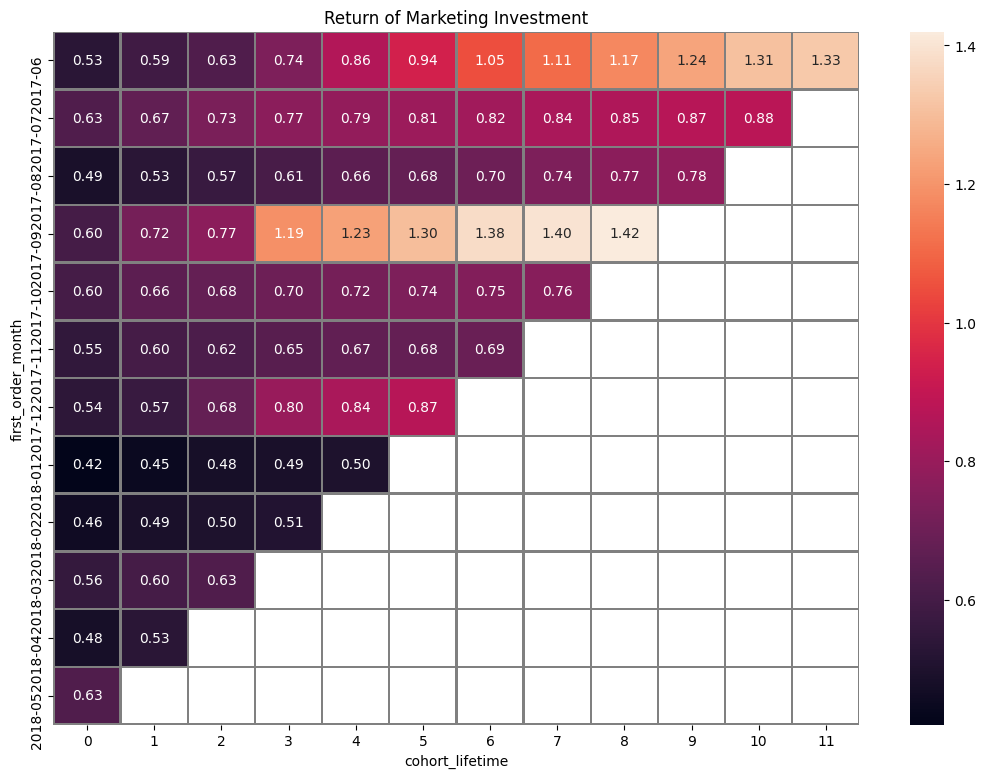

In [82]:
plt.figure(figsize=(13, 9))
plt.title('Return of Marketing Investment')
romi_heatmap = sns.heatmap(
    cum_romi_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 

Conclusons:

The June 2017 cohort achieved a return on marketing investment (ROMI) of 1.05 in the 7th month, successfully covering marketing costs. The September 2017 cohort performed even better, covering marketing costs in just 4 months with a ROMI of 1.19, driven by a surge in sales in the 4th month. In contrast, other cohorts have yet to successfully cover their marketing costs."
    

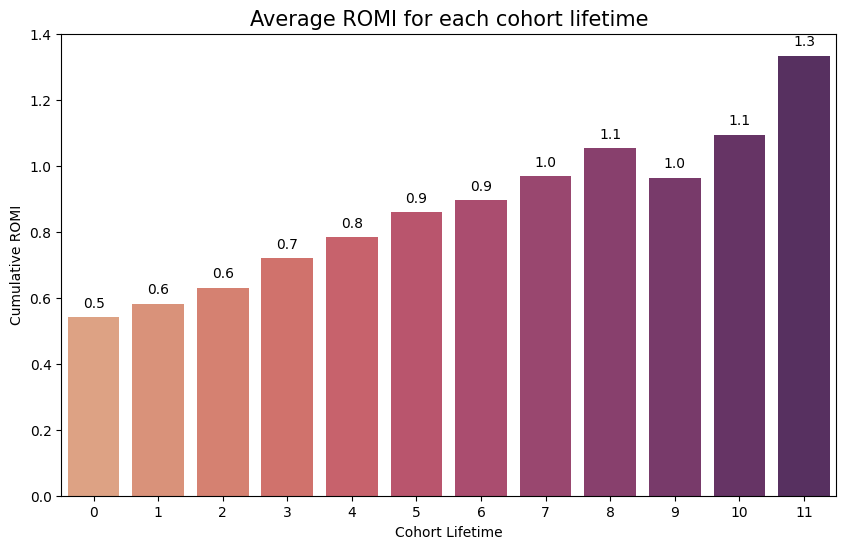

In [83]:
cum_romi = romi_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cum_romi.columns = ['cohort_lifetime', 'cum_romi']

plt.figure(figsize=(10,6))
c = sns.barplot(data=cum_romi, x='cohort_lifetime', y='cum_romi', palette='flare')

for g in c.patches:
    c.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
plt.title('Average ROMI for each cohort lifetime',fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Cumulative ROMI')
plt.show()

Concluson: 

On average, cohorts tend to cover marketing costs by the end of the 7th month. Despite positive results from cohorts, the business still experiences losses because significant company growth didn't start until the end of the year. With increased spending comes a rise in new customers, and it can take up to seven months for the business to break even. As a result, profits do not yet fully offset expenses. In summary, the business remains relatively healthy.

[Back to Contents](#back)

# Step 3. Conclusion  <a id='conclusion'></a>

__Introduction__

_This report presents findings, results, and key insights from the data analysis conducted on the online ticket service Yandex Afisha. The analysis is divided into three sections: Product Analysis, Sales Analysis, and Marketing Analysis. The project aims to answer questions regarding how people use the product, when they begin purchasing, the revenue generated per customer, and the timeframe in which they become profitable._


__Data Analysis Process__

_The data analysis included three datasets: visits, orders, and costs. Each provided the necessary information for the study. The ‘visits’ dataset initially posed a challenge due to its large size, potentially affecting calculations and accuracy. To optimize it, object types were removed, and data formats were standardized to dates and categories, reducing the dataset size to 16.5 KB. No missing values or duplicates were detected._

_The ‘orders’ and ‘marketing’ datasets were also cleaned and standardized by converting date columns to datetime format and renaming columns for easier manipulation. As with the ‘visits’ dataset, no missing values or duplicates were found._

__Methods, Analysis, and Results__

_The analysis is organized into three parts. In the first part, we assessed customers' behavior and product use, exploring daily, weekly, and monthly user sessions._

_Main Insights:_
* _Yandex Afisha’s daily active user (DAU) analysis reveals consistent engagement, demonstrating the platform’s popularity and usefulness._
* _User activity peaked in November 2017, possibly due to the holiday season, cultural events, promotions, marketing campaigns, new features, or a shift towards indoor activities because of the weather._
* _DAU, WAU, and MAU metrics all exhibit similar trends, with increased activity during colder months and decreased activity in spring and summer._
* _Average daily users: 907. Average weekly users: 5,825. Average monthly users: 23,228_
* _Yandex Afisha sees approximately 987 daily sessions, with an average session length of around 10 minutes. The most common session length is 60 seconds._

_Retention Analysis:_

_We analyzed customer retention by categorizing users into cohorts based on their joining month, calculating their age, and tracking retention rates over time._

_Key Findings:_
* _Retention rates generally decrease over time, a typical trend for most businesses._
* _The cohort from September 2017 has the highest retention in the first and second months._
* _The cohort from June 2017 shows higher retention during their fifth, sixth, and seventh months of product use._
* _Average sticky factor: Weekly at 15.59%, Monthly at 3.91%._

_The findings of the report, including graphs and visualizations, can be found in the product analysis section. This analysis provides a comprehensive overview of the product, with the final summary focusing on answering the key questions posed at the beginning._


_In the Sales Analysis, we sought to answer four key questions: When do people start buying? How many orders do they make during a given period? What is the average purchase size? How much money do they bring? (LTV)._

_We examined how many orders customers made over time. For example, of the 2,354 customers who made their first order in June 2017, 177 made another order the following month, and so on. This suggests that the highest number of orders occurs during the first month after a user makes their initial purchase. The first three cohorts showed increased orders in October, November, and December. Retention drops significantly after three months, indicating this as a critical period for customer retention.
The average purchase size varies across cohorts. Users who joined in June 2017 had the highest average purchase size, while a sharp increase was noted for the December 2017 cohort, possibly due to promotions or other external factors.
LTV measures the total revenue a customer brings to the company. Monthly cohort analysis helps determine the cumulative income each group brings. For example, the June 2017 cohort generated a total revenue of $ 9,557 49 that month. Each customer from this cohort brought an average of $11.88 in revenue over their 12-month lifetime.
Overall, the analysis reveals that customers tend to make their highest number of orders in the first month after their initial purchase, with retention rates and average purchase sizes varying across cohorts, and a notable increase in sales occurring during colder months and around promotional periods._

_The Marketing analysis shows that while overall marketing costs totaled $ 329,131 USD, significant spending was focused on ad source 3 (43% of the budget). Marketing spending increases toward the end of the year and decreases in the middle. Customer acquisition cost (CAC) revealed a fact that spending more money on marketing can result in a good final return. 
Return on marketing investment (ROMI) varies across cohorts, with June 2017 covering costs by the 7th month (ROMI of 1.05) and September 2017 performing better by achieving ROMI of 1.19 in just 4 months. Most cohorts take up to seven months to break even, indicating the business is relatively healthy despite ongoing efforts to balance expenses with profits._

__Conclusion__

_The data analysis report on Yandex Afisha provides valuable insights into customer behavior, sales trends, and marketing effectiveness. The product analysis reveals consistent user engagement, peaking in the colder months, and a need to improve retention rates to sustain user activity. Sales analysis shows that customers tend to make the most orders in the first month after their initial purchase, with a critical retention period around three months. Cohorts also display varying average purchase sizes and Lifetime Value (LTV), with notable spikes during promotional periods.
The marketing analysis highlights the need for a strategic approach to spending, as ad source 3 accounted for 43% of the budget. Although ad source 6 proved ineffective, shifting efforts to ad source 5 may yield better results. Cohorts take up to seven months to cover marketing costs, with June 2017 and September 2017 cohorts achieving ROMI of 1.05 and 1.19, respectively.
In summary, Yandex Afisha exhibits strong user engagement and purchasing trends, with opportunities to optimize retention and improve marketing strategies. By focusing on the initial user experience, targeted marketing, and cost-effective customer acquisition, the platform can enhance profitability and maintain steady growth._





[Back to Contents](#back)